In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [2]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_labels_df.pkl"))

In [3]:
# Remove all the features that are not contains 'DVA' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

In [4]:
features_df.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,Fixations_Re_Entries_To_RoI_Rate_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,362.0,2846.0,0.127196,1.0,0.151906,2.0,19.0,0.105263,1.0,0.151906,...,1.913310,0.074887,38533.936397,12.057026,11.984912,4.129754,18.892626,2.158016,0.901186,253.197545
1,0.0,3152.0,0.000000,0.0,0.000000,0.0,24.0,0.000000,0.0,0.000000,...,4.869337,0.076843,62401.639611,19.537556,20.318455,4.455147,24.529186,5.800678,0.909403,468.901337
2,2.0,4483.0,0.000446,1.0,0.110607,0.0,35.0,0.000000,0.0,0.000000,...,8.500427,0.078080,89362.852438,19.794390,19.715767,5.647210,32.227261,8.632164,0.954553,692.803662
3,315.0,1532.0,0.205614,3.0,0.778413,3.0,11.0,0.272727,3.0,0.778413,...,3.685488,0.151934,24273.412186,12.700200,12.919455,6.805681,31.443375,4.121637,1.818895,177.802803
4,46.0,5305.0,0.008671,5.0,0.449738,0.0,38.0,0.000000,0.0,0.000000,...,2.423086,0.027103,53351.891042,9.843929,9.456629,1.984475,14.161600,6.530041,0.321924,374.069321


In [5]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5232 entries, 0 to 5231
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gaze_Counts_In_RoI_Pre                        5101 non-null   float64
 1   Gaze_Counts_Out_RoI_Pre                       5101 non-null   float64
 2   Gaze_In_out_RoI_Ratio_Pre                     5101 non-null   float64
 3   Gaze_Re_Entries_To_RoI_Count_Pre              5101 non-null   float64
 4   Gaze_Re_Entries_To_RoI_Rate_Pre               5101 non-null   float64
 5   Fixations_Counts_In_RoI_Pre                   5101 non-null   float64
 6   Fixations_Counts_Out_RoI_Pre                  5101 non-null   float64
 7   Fixations_In_out_RoI_Ratio_Pre                5101 non-null   float64
 8   Fixations_Re_Entries_To_RoI_Count_Pre         5101 non-null   float64
 9   Fixations_Re_Entries_To_RoI_Rate_Pre          5101 non-null   f

In [6]:
labels_df.head()

,Session
series_id,
0,0
1,0
2,1
3,1
4,1


In [7]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232 entries, 0 to 5231
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Session  5232 non-null   int32
dtypes: int32(1)
memory usage: 61.3 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [8]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre           1021
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    1021
onset_Max_Saccades_Start_In_RoI_Pre              775
onset_Median_Saccades_Start_In_RoI_Pre           775
onset_Mean_Saccades_Start_In_RoI_Pre             775
Duration_Max_Saccades_Start_In_RoI_Pre           775
vis_angle_Max_Saccades_Start_In_RoI_Pre          775
peak_velocity_Max_Saccades_Start_In_RoI_Pre      775
onset_Min_Saccades_Start_In_RoI_Pre              775
Duration_Min_Saccades_Start_In_RoI_Pre           775
dtype: int64

Remove columns with more than 30% missing values

In [9]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.3 * features_df.shape[0]]

In [10]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre           1021
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre    1021
onset_Max_Saccades_Start_In_RoI_Pre              775
onset_Median_Saccades_Start_In_RoI_Pre           775
onset_Mean_Saccades_Start_In_RoI_Pre             775
Duration_Max_Saccades_Start_In_RoI_Pre           775
vis_angle_Max_Saccades_Start_In_RoI_Pre          775
peak_velocity_Max_Saccades_Start_In_RoI_Pre      775
onset_Min_Saccades_Start_In_RoI_Pre              775
Duration_Min_Saccades_Start_In_RoI_Pre           775
dtype: int64

how many missing values are there in each row? show the top 10

In [11]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

224     73
490     73
3627    73
4714    73
437     73
3694    73
1310    73
1664    73
1182    73
4780    73
dtype: int64

Remove rows with more than 30% missing values

In [12]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.3 * features_df.shape[1], :]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [13]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

2928    19
2863    19
4064    19
3450    19
3250    19
2291    19
2391    19
1527    19
4130    19
1795    17
dtype: int64

Train/Test Split (before any preprocessing is done)

In [14]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "remembered_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly
random = np.random
random.seed(1)
random.shuffle(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['no_nap_YD1' 'animation_AJ31' 'animation_KR13' 'animation_BB30'
 'animation_BG97' 'animation_KL89' 'animation_WE10' 'no_nap_IH1'
 'no_nap_AM2' 'no_nap_RG9' 'animation_RS30' 'no_nap_TC9' 'animation_MN01'
 'no_nap_SZ9' 'animation_GN10' 'no_nap_LG3' 'animation_NN81' 'no_nap_AI5'
 'animation_NY90' 'no_nap_AM1' 'no_nap_KS0' 'no_nap_GA2' 'no_nap_VH3'
 'no_nap_AL5' 'no_nap_AM5' 'animation_BO03' 'no_nap_RA0' 'animation_PS08'
 'animation_DK47' 'no_nap_OR1' 'no_nap_NT6' 'no_nap_SS1' 'no_nap_AN5'
 'no_nap_MM81' 'no_nap_RJ0' 'no_nap_YS4' 'animation_MN37' 'no_nap_YP2'
 'no_nap_DM4' 'animation_KM28' 'animation_SM28' 'animation_FY25'
 'no_nap_NM9' 'animation_RY20' 'animation_ZN05' 'animation_CR06'
 'animation_AI09' 'no_nap_BK3' 'animation_AM45' 'no_nap_SK7' 'no_nap_DF3'
 'no_nap_LK3' 'animation_RN85' 'animation_BH27' 'animation_GE44'
 'no_nap_MG1' 'animation_HM02' 'no_nap_DD2' 'animation_ZW57'
 'animation_AS20']
['animation_MA40' 'no_nap_LS1' 'animation_TA01' 'animation_PM15'
 'animation_HR58' 'no_n

In [15]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df,
#                                                     random_state=420,
#                                                     test_size=0.2)

In [16]:
X_train.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_Out_RoI_Pre,Gaze_In_out_RoI_Ratio_Pre,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Rate_Pre,Fixations_Counts_In_RoI_Pre,Fixations_Counts_Out_RoI_Pre,Fixations_In_out_RoI_Ratio_Pre,Fixations_Re_Entries_To_RoI_Count_Pre,Fixations_Re_Entries_To_RoI_Rate_Pre,...,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
2,2.0,4483.0,0.000446,1.0,0.110607,0.0,35.0,0.000000,0.0,0.000000,...,8.500427,0.078080,89362.852438,19.794390,19.715767,5.647210,32.227261,8.632164,0.954553,692.803662
3,315.0,1532.0,0.205614,3.0,0.778413,3.0,11.0,0.272727,3.0,0.778413,...,3.685488,0.151934,24273.412186,12.700200,12.919455,6.805681,31.443375,4.121637,1.818895,177.802803
4,46.0,5305.0,0.008671,5.0,0.449738,0.0,38.0,0.000000,0.0,0.000000,...,2.423086,0.027103,53351.891042,9.843929,9.456629,1.984475,14.161600,6.530041,0.321924,374.069321
7,2.0,2457.0,0.000814,1.0,0.181818,0.0,14.0,0.000000,0.0,0.000000,...,10.169280,0.162665,58929.038685,21.276224,19.538693,8.127455,32.915241,10.145712,2.172154,297.867142
8,0.0,2605.0,0.000000,0.0,0.000000,0.0,21.0,0.000000,0.0,0.000000,...,7.003062,0.112606,46076.539195,17.859609,17.663242,5.616025,26.175268,7.667596,1.225517,375.051783


Fill missing values with the mean of the column

In [17]:
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())
#
# X_train = X_train.fillna(0) # fill missing values with the mean of the column or zero ? features_df.mean()
# X_test = X_test.fillna(0)

Balancing the dataset

In [18]:
y_train.value_counts()

Session
1          2045
0          1949
dtype: int64

Scaling

In [19]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

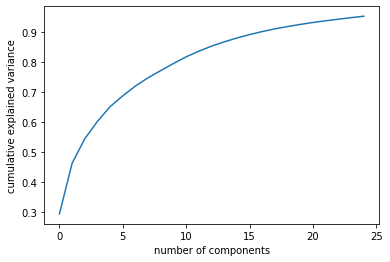

In [20]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [21]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
X_train_pca

array([[-6.68327635,  1.55754163, -3.40906043, ...,  0.22034793,
         0.41162833, -0.14881751],
       [ 0.24189111, -0.06089119,  1.60495915, ...,  0.95427832,
         0.66006529, -0.42070061],
       [-2.11382734,  0.62165238, -0.05257825, ...,  1.80168801,
        -0.12777273,  1.30155888],
       ...,
       [ 1.54359993, -0.4576221 , -0.23085867, ...,  0.14772547,
        -0.62550778, -0.13233961],
       [-6.2433176 , -0.319411  , -2.77624557, ...,  0.59966684,
         0.12064081,  0.13655111],
       [-4.69599809, -3.37424728,  0.36055907, ..., -0.62704721,
         0.3826508 , -0.47221866]])

LDA

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

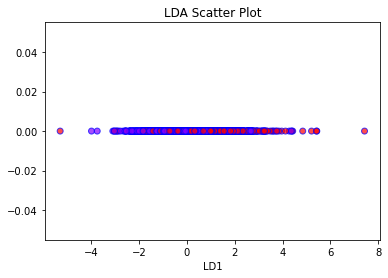

In [24]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [25]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [28]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 0.9, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.2642857142857143, 'penalty': 'l2', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.61
Precision: 0.6
Recall: 0.66
F1-score: 0.63
ROC-AUC score: 0.61


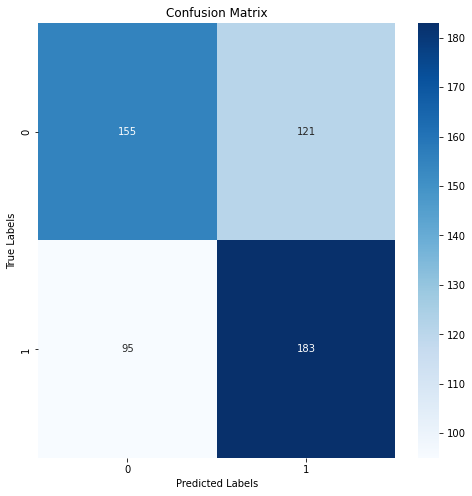

In [29]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}

Gradient Boosting (test data)
Accuracy: 0.61
Precision: 0.59
Recall: 0.72
F1-score: 0.65
ROC-AUC score: 0.61


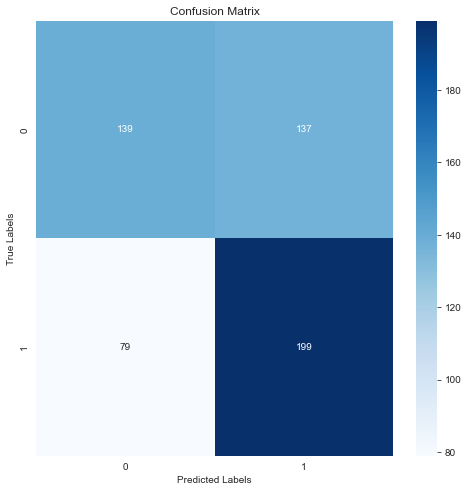

In [31]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 120, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

Random Forest (test data)
Accuracy: 0.58
Precision: 0.59
Recall: 0.59
F1-score: 0.59
ROC-AUC score: 0.58


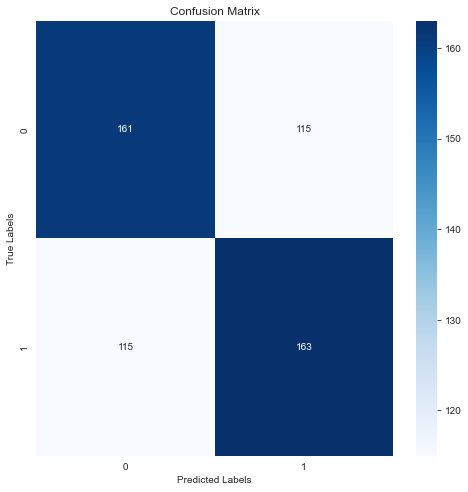

In [33]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [34]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 0.5, 10)
MAX_DEPTH = range(1, 4)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.59
Precision: 0.6
Recall: 0.58
F1-score: 0.59
ROC-AUC score: 0.59


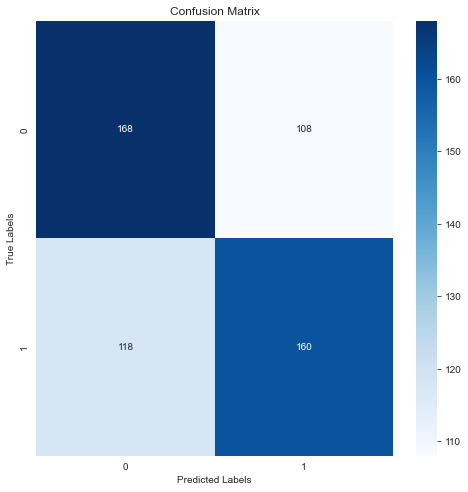

In [35]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [36]:
!pip install pytorch-tabnet
!pip install optuna

In [37]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [38]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 15),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet_classifier = TabNetClassifier(**best_params)
tabnet_classifier.fit(X_train_np, y_train)
best_params

[I 2023-07-30 22:34:43,100] A new study created in memory with name: no-name-6128b48f-9892-4c6c-ba89-f6a5c1c0536a



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.62909


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-07-30 22:45:21,988] Trial 0 finished with value: 0.6290858617453863 and parameters: {'n_d': 12, 'n_a': 23, 'n_steps': 9, 'gamma': 0.4477396789079473, 'n_independent': 8, 'n_shared': 4, 'lambda_sparse': 0.09038343107353568}. Best is trial 0 with value: 0.6290858617453863.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.28608 |  0:00:20s
epoch 1  | loss: 3.3059  |  0:00:37s
epoch 10 | loss: 1.13285 |  0:02:54s
epoch 11 | loss: 1.05276 |  0:03:08s
epoch 12 | loss: 1.0416  |  0:03:23s
epoch 13 | loss: 0.99781 |  0:03:36s
epoch 14 | loss: 1.00627 |  0:03:49s
epoch 15 | loss: 1.00629 |  0:04:02s
epoch 16 | loss: 0.98737 |  0:04:13s
epoch 17 | loss: 0.98974 |  0:04:26s
epoch 18 | loss: 0.98341 |  0:04:38s
epoch 19 | loss: 0.98219 |  0:04:52s
epoch 20 | loss: 0.97554 |  0:05:05s
epoch 21 | loss: 0.97318 |  0:05:18s
epoch 22 | loss: 0.9607  |  0:05:31s
epoch 23 | loss: 0.96148 |  0:05:44s
epoch 24 | loss: 0.95515 |  0:05:56s
epoch 25 | loss: 0.95104 |  0:06:09s
epoch 26 | loss: 0.94694 |  0:06:21s
epoch 27 | loss: 0.94607 |  0:06:33s
epoch 28 | loss: 0.9445  |  0:06:47s
epoch 29 | loss: 0.93841 |  0:07:00s
epoch 30 | loss: 0.93486 |  0:07:13s
epoch 31 | loss: 0.92659 |  0:07:26s
epoch 32 | loss: 0.92185 |  0:07:39s
epoch 33 | loss: 0.9165  |  0:07:51s
epoch 34 | loss: 0.91525 |  0:08:03s
e

{'n_d': 12,
 'n_a': 23,
 'n_steps': 9,
 'gamma': 0.4477396789079473,
 'n_independent': 8,
 'n_shared': 4,
 'lambda_sparse': 0.09038343107353568}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.52
Precision: 0.52
Recall: 0.57
F1-score: 0.54
ROC-AUC score: 0.52


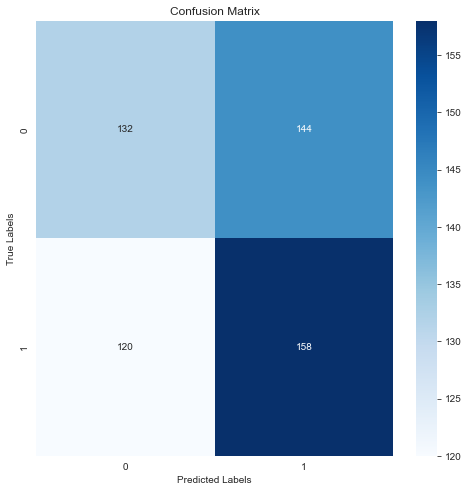

In [39]:
# Evaluate final model on test set
y_test_pred = tabnet_classifier.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [42]:
the_best_model_ever = gb_best_estimator

Feature importance

In [43]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Gaze_In_out_RoI_Ratio_Pre,0.126563
peak_velocity_Max_Saccades_End_In_RoI_Pre,0.059032
DVA_Sem_Gaze_Pre,0.054278
Fixations_Counts_Out_RoI_Pre,0.049868
DVA_AUC_Fixations_Pre,0.048003
...,...
onset_Sem_Fixations_In_RoI_Pre,0.000000
onset_AUC_Fixations_In_RoI_Pre,0.000000
Saccades_End_Counts_Out_RoI_Pre,0.000000
Fixations_Counts_In_RoI_Pre,0.000000
